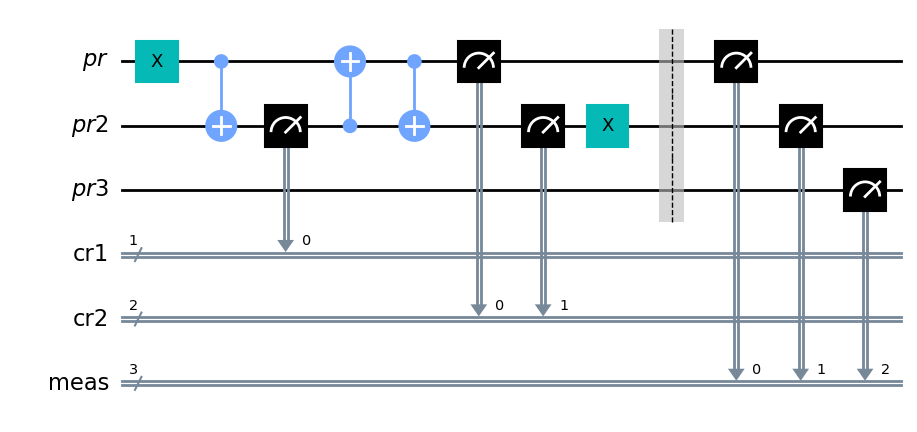

In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
import convert

pp = QuantumCircuit()
pr = QuantumRegister(1, 'pr')
pr2 = QuantumRegister(1, 'pr2')
pr3 = QuantumRegister(1, 'pr3')
cr1 = ClassicalRegister(1, 'cr1')
cr2 = ClassicalRegister(2, 'cr2')
pp.add_register(pr,pr2,cr1,cr2,pr3)
pp.x(pr[0])
pp.cx(pr[0],pr2[0])
pp.measure(pr2[0], cr1[0])
pp.cx(pr2[0],pr[0])
pp.cx(pr[0],pr2[0])
pp.measure([pr[0],pr2[0]], [cr2[0],cr2[1]])
pp.x(pr2[0])
pp.measure_all()
pp.draw('mpl')

In [1]:
run testCases.py


...
----------------------------------------------------------------------
Ran 3 tests in 1.016s

OK


In [3]:
pathname = "/Users/tommtommbom/Desktop/Classes/EE 522 - QMPI/QASMBench-master/small/hhl_n7/hhl_n7.qasm"
kks = QuantumCircuit.from_qasm_file(pathname)
#kks.draw('mpl')

{'0101000': 1, '0000001': 104, '0000000': 212, '1000001': 486, '1000000': 197}


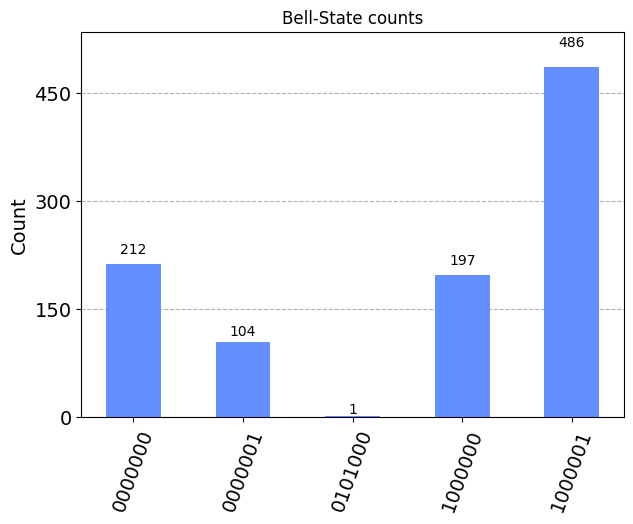

In [9]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')

from qiskit.visualization import plot_histogram
#pp2 = transpile(pp,aer_sim)
result = aer_sim.run(kks, shots = 1000).result()
counts = result.get_counts(kks)
print(counts)
plot_histogram(counts, title='Bell-State counts')


In [6]:
# converts count dicitonary to probabilities
def convertToProb(counts):
    sums = sum(counts.values())
    print(sums)
    for k,v in counts:
        counts[k] = v/sums
    return counts
convertToProb(counts)

10000


ValueError: too many values to unpack (expected 2)

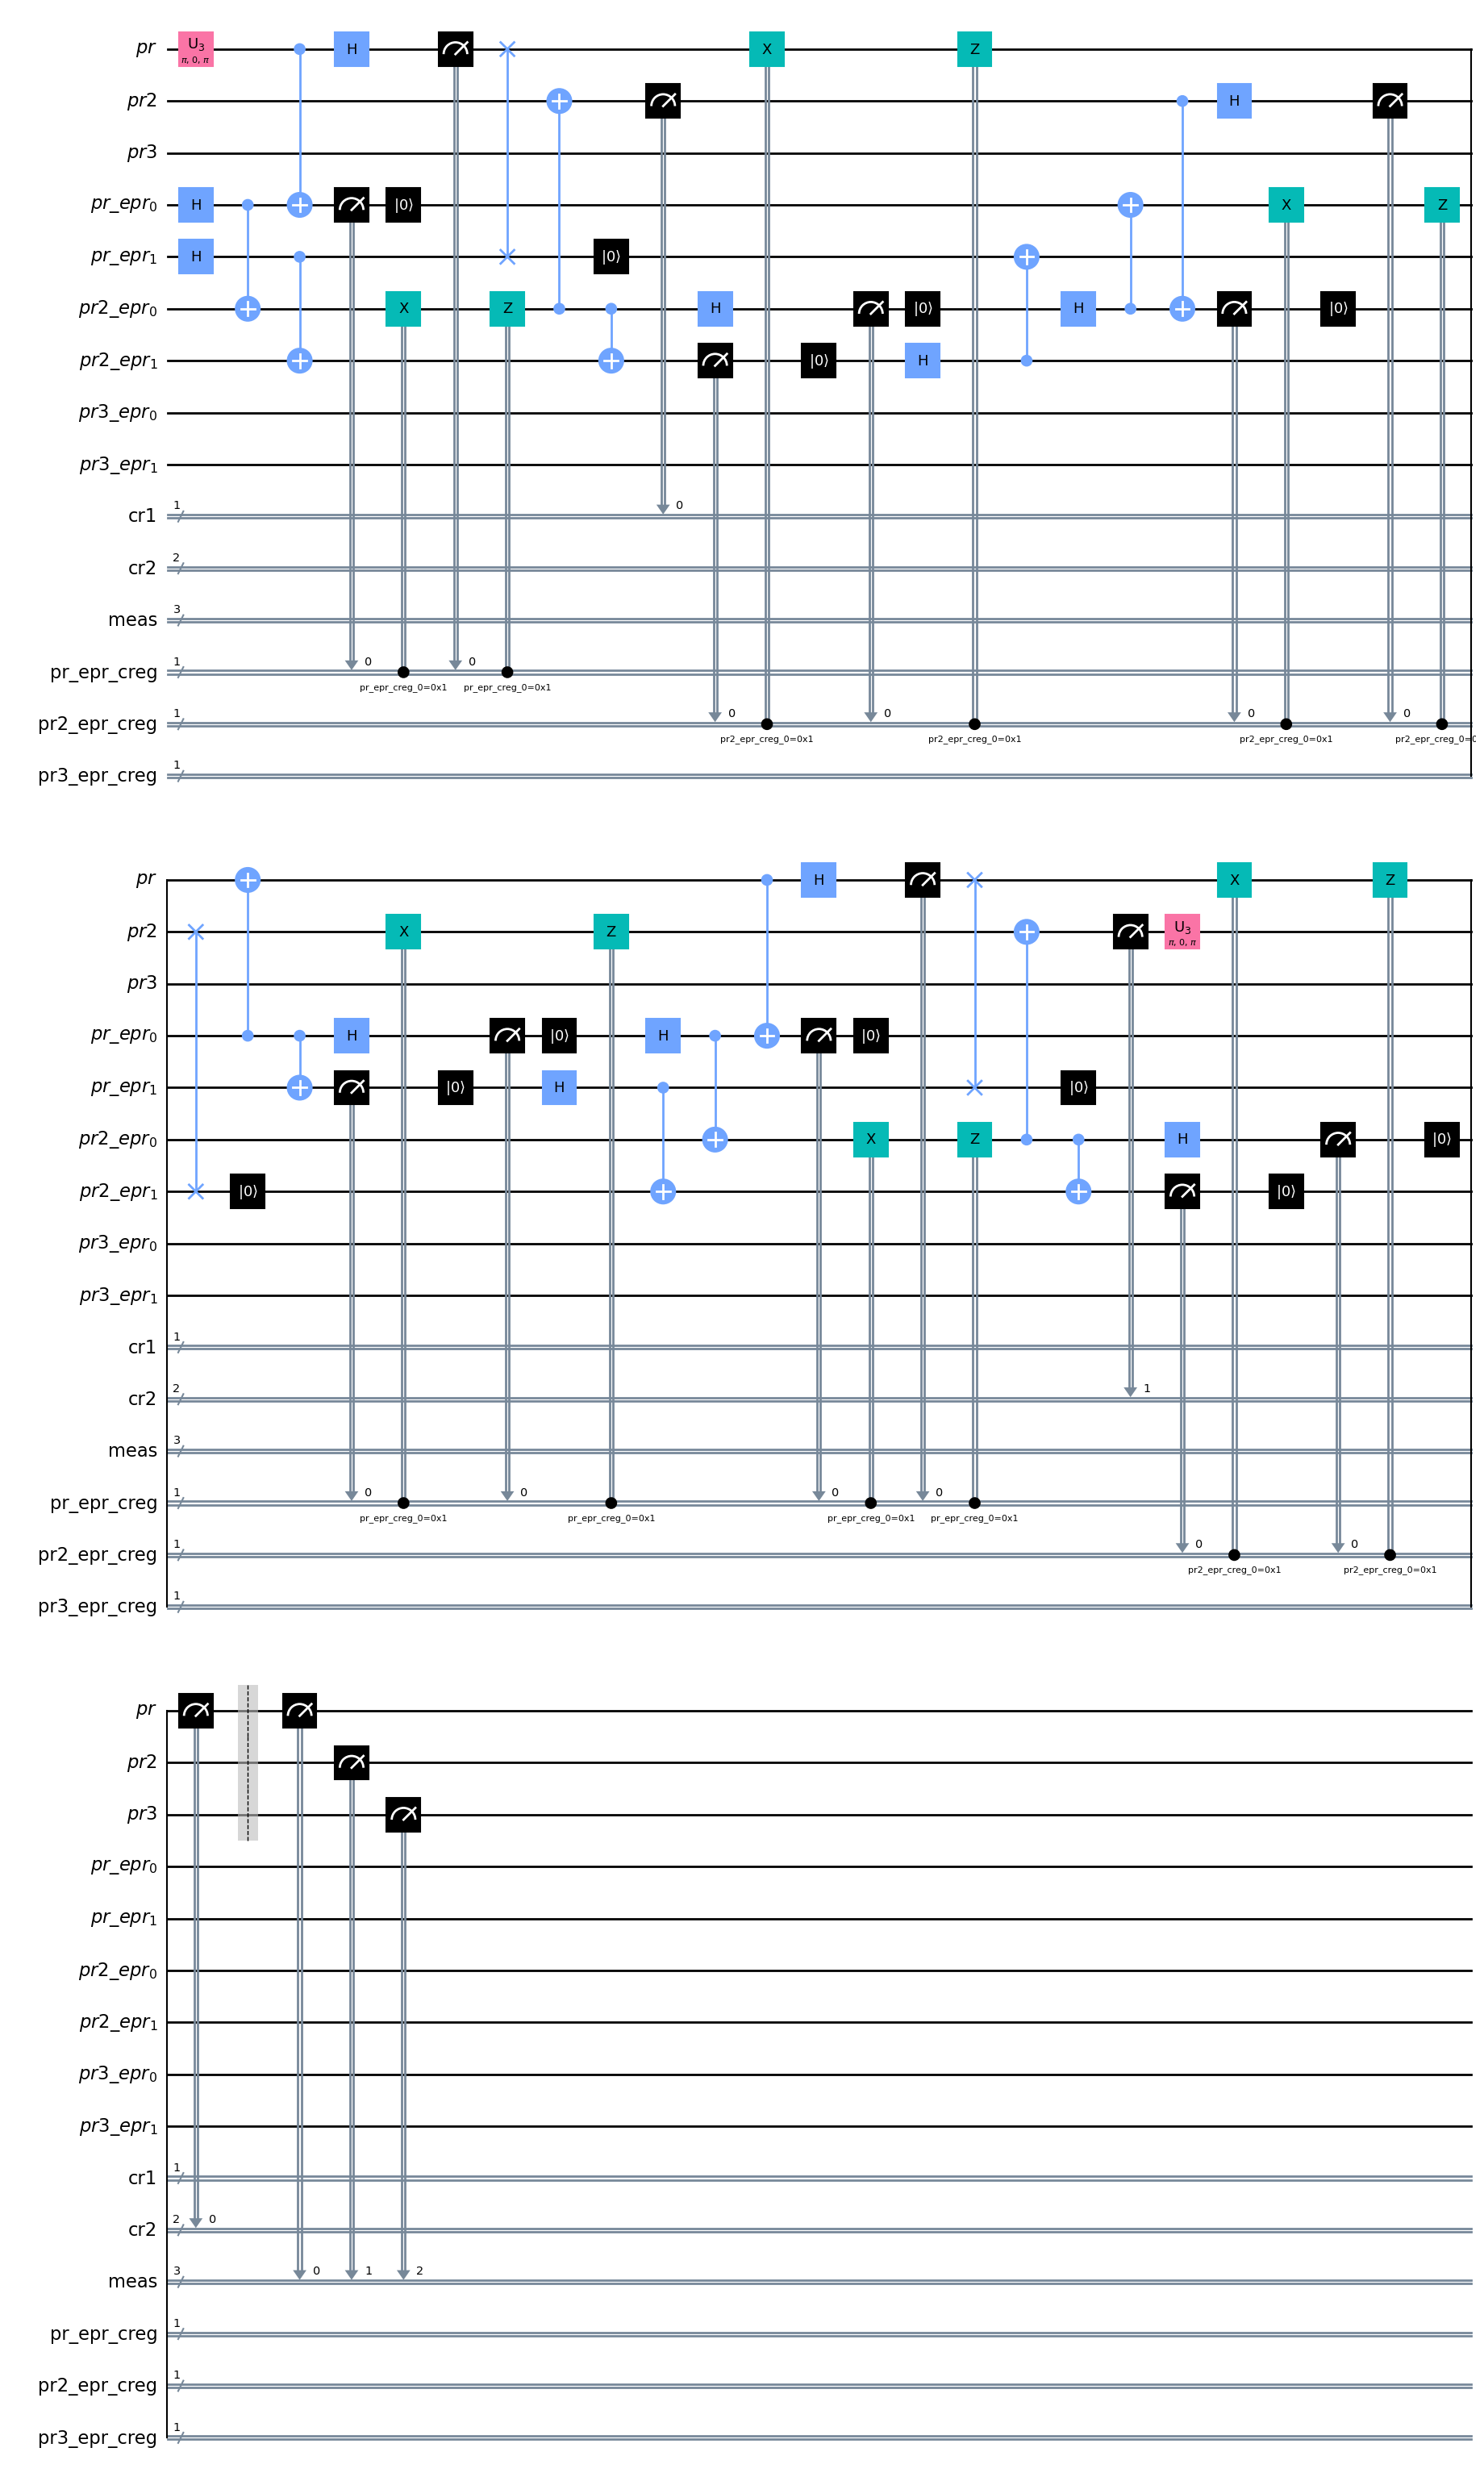

In [5]:
qtr = convert.convertQC(pp)
qtr.draw("mpl")

{'0 1 1 000 10 1': 259, '0 0 1 000 10 1': 272, '0 1 0 000 10 1': 216, '0 0 0 000 10 1': 253}
{'pr_epr_creg': 1, 'pr2_epr_creg': 1, 'pr3_epr_creg': 0}


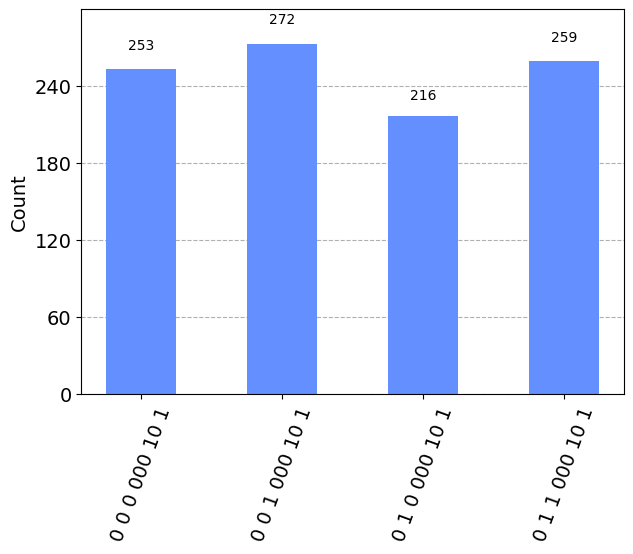

In [6]:
result = aer_sim.run(qtr, shots = 1000).result()
counts = result.get_counts(qtr)
print(counts)
print(qtr.metadata)
plot_histogram(counts)

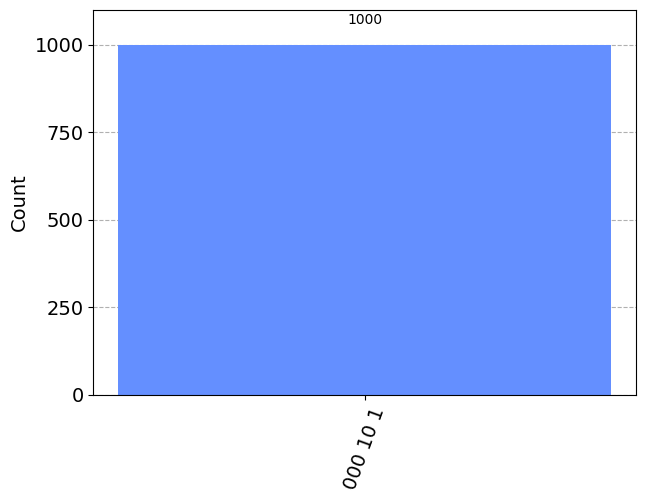

In [7]:
das = convert.getActualCounts(qtr, counts)
plot_histogram(das)